In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA



In [4]:
df=pd.read_csv('/Users/akanshamalviya/Documents/Input_Data/breast-cancer-wisconsin-data.csv')

In [5]:
pd.pandas.set_option('display.max_columns',None)
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
199,M,14.450,20.22,94.49,642.7,0.09872,0.1206,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.01597,0.02000,0.007303,0.01522,0.001976,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.1838,0.4753,0.10130
152,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.85,0.010970,0.09586,0.39600,0.052790,0.03546,0.029840,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.12590
190,M,14.220,23.12,94.37,609.9,0.10750,0.2413,0.19810,0.06618,0.2384,0.07542,0.2860,2.1100,2.112,31.72,0.007970,0.13540,0.11660,0.016660,0.05113,0.011720,15.74,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460
94,M,15.060,19.83,100.30,705.6,0.10390,0.1553,0.17000,0.08815,0.1855,0.06284,0.4768,0.9644,3.706,47.14,0.009250,0.03715,0.04867,0.018510,0.01498,0.003520,18.23,24.23,123.50,1025.0,0.1551,0.4203,0.5203,0.2115,0.2834,0.08234
340,B,14.420,16.54,94.15,641.2,0.09751,0.1139,0.08007,0.04223,0.1912,0.06412,0.3491,0.7706,2.677,32.14,0.004577,0.03053,0.03840,0.012430,0.01873,0.003373,16.67,21.51,111.40,862.1,0.1294,0.3371,0.3755,0.1414,0.3053,0.08764


In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
df.replace(['B','M'],[1,0],inplace=True)

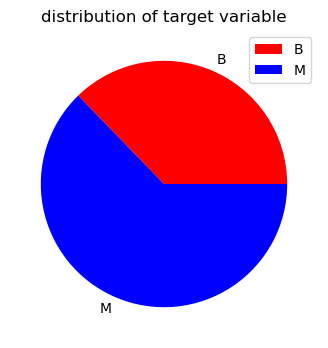

In [10]:
#distribution of the target variable
plt.figure(figsize=(6,4))
plt.title("distribution of target variable")
plt.pie([df['diagnosis'].value_counts()[0],df['diagnosis'].value_counts()[1]],colors=['r','b'],labels=['B','M'])
plt.legend()
plt.show()

CORRELATION BETWEEN THE TARGET AND OTHER VARIABLES

In [11]:
#correlation between variables
df.corr()['diagnosis'].sort_values

<bound method Series.sort_values of diagnosis                  1.000000
radius_mean               -0.730029
texture_mean              -0.415185
perimeter_mean            -0.742636
area_mean                 -0.708984
smoothness_mean           -0.358560
compactness_mean          -0.596534
concavity_mean            -0.696360
concave points_mean       -0.776614
symmetry_mean             -0.330499
fractal_dimension_mean     0.012838
radius_se                 -0.567134
texture_se                 0.008303
perimeter_se              -0.556141
area_se                   -0.548236
smoothness_se              0.067016
compactness_se            -0.292999
concavity_se              -0.253730
concave points_se         -0.408042
symmetry_se                0.006522
fractal_dimension_se      -0.077972
radius_worst              -0.776454
texture_worst             -0.456903
perimeter_worst           -0.782914
area_worst                -0.733825
smoothness_worst          -0.421465
compactness_worst         -0

# Splitting dataset into train and test sets

train_ratio = 0.7
test_ratio = 0.3

In [12]:
# Divide data into Features and Target Variable
X = df.drop(columns=['diagnosis']) # Features
y = df['diagnosis'] # diagnosis is the target Variable

In [13]:
# splitting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((398, 30), (171, 30), (398,), (171,))

# Task 1: Train Decision Tree classifiers with Entropy and GINI

In [14]:
# Train Decision Tree classifier with Entropy (C1)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Train Decision Tree classifier with GINI (C2)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

# Evaluate performance
accuracy_entropy = accuracy_score(y_test, dt_entropy.predict(X_test))
accuracy_gini = accuracy_score(y_test, dt_gini.predict(X_test))

print("Accuracy of Decision Tree with Entropy:", accuracy_entropy)
print("Accuracy of Decision Tree with GINI:", accuracy_gini)

Accuracy of Decision Tree with Entropy: 0.9649122807017544
Accuracy of Decision Tree with GINI: 0.9415204678362573


# Task 2: Visualize the C1 and C2 by using the “graphviz” library

In [16]:
# Visualize Decision Tree with Entropy C1
dot_data_entropy = export_graphviz(dt_entropy, out_file='none', feature_names=df.drop(['diagnosis'], axis=1).columns, class_names= ['benign', 'malignant'])
graph_entropy = graphviz.Source(dot_data_entropy)
graph_entropy.render("DecisionTree_Entropy")


AttributeError: 'NoneType' object has no attribute 'splitlines'

In [ ]:
# Visualize Decision Tree with GINI C2
dot_data_gini = export_graphviz(dt_gini, out_file=None,feature_names = df.drop(['diagnosis'], axis=1).columns,  class_names = ['benign', 'malignant'])
graph_gini = graphviz.Source(dot_data_gini)
graph_gini.render("DecisionTree_GINI")


# Task 3: Prune Decision Trees by limiting depth

In [ ]:
# Prune Decision Tree with depth limit
depth_limit = 5

pruned_dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth_limit, random_state=42)
pruned_dt_entropy.fit(X_train, y_train)

pruned_dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth_limit, random_state=42)
pruned_dt_gini.fit(X_train, y_train)

# Evaluate performance of pruned trees
accuracy_pruned_entropy = accuracy_score(y_test, pruned_dt_entropy.predict(X_test))
accuracy_pruned_gini = accuracy_score(y_test, pruned_dt_gini.predict(X_test))

print("Accuracy of Pruned Decision Tree with Entropy:", accuracy_pruned_entropy)
print("Accuracy of Pruned Decision Tree with GINI:", accuracy_pruned_gini)


# Task 4: Plot performance for different depths

In [ ]:
depths = range(1, 21)
accuracy_scores_entropy = []
accuracy_scores_gini = []

for depth in depths:
    dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_entropy.fit(X_train, y_train)
    accuracy_scores_entropy.append(accuracy_score(y_test, dt_entropy.predict(X_test)))
    
    dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_gini.fit(X_train, y_train)
    accuracy_scores_gini.append(accuracy_score(y_test, dt_gini.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores_entropy, label='Entropy')
plt.plot(depths, accuracy_scores_gini, label='Gini')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Performance of Decision Trees with Different Depths')
plt.legend()
plt.show()


The plot of performance for different depths shows how the accuracy of decision tree models varies as we change the maximum depth of the trees.

The x-axis represents the depth of the decision trees, ranging from 1 to 20.
The y-axis represents the accuracy of the decision tree models on the test data.
The graph typically shows a pattern where the accuracy initially increases with increasing depth, as the model can capture more intricate patterns in the training data. However, after reaching a certain depth, the accuracy may start to decrease or plateau, indicating overfitting, where the model captures noise instead of general patterns.

By observing the graph, we can determine the optimal depth where the accuracy is highest before overfitting starts to occur. This optimal depth is chosen to balance between model complexity and generalization performance.

# Task 5: Choose the best value for depth and visualize Decision Trees
From the plot generated in Task 4, choosed the depth with the highest accuracy. 
Then visualized the Decision Trees for both criteria with that depth.

If the best depth is 4:

In [ ]:
best_depth = 4

best_dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
best_dt_entropy.fit(X_train, y_train)

best_dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=best_depth, random_state=42)
best_dt_gini.fit(X_train, y_train)

# Visualize Decision Trees with best depth


display(graphviz.Source(tree.export_graphviz(best_dt_entropy, out_file=None, filled=True, rounded=True, special_characters=True)))
#dot_data_best_entropy = export_graphviz(best_dt_entropy, out_file=None, feature_names=df.drop(['diagnosis'], axis=1).columns, class_names=class_names= ['benign', 'malignant'])
#graph_best_entropy = graphviz.Source(dot_data_best_entropy)
#graph_best_entropy.render("BestDecisionTree_Entropy")

#dot_data_best_gini = export_graphviz(best_dt_gini, out_file=None, feature_names=data.feature_names, class_names=data.target_names)
#graph_best_gini = graphviz.Source(dot_data_best_gini)
#graph_best_gini.render("BestDecisionTree_GINI")


In [ ]:
# b) Visualize the C1 and C2 by using the “graphviz” library
def visualize_tree(tree_classifier, feature_names):
    dot_data = export_graphviz(tree_classifier, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns,
                               filled=True, out_file='tree.dot')
    graph = graphviz.Source(dot_data)
    return graph
    
graph_entropy = visualize_tree(dt_entropy, X.columns)
graph_entropy.render("dt_entropy_tree")

graph_gini = visualize_tree(dt_gini, X.columns)
graph_gini.render("dt_gini_tree")

# Task 2a: Train Random Forest classifier with 10 estimators

In [ ]:
# Train Random Forest classifier with 10 estimators
rf_10 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_10.fit(X_train, y_train)

# Evaluate performance
accuracy_rf_10 = accuracy_score(y_test, rf_10.predict(X_test))
print("Accuracy of Random Forest with 10 estimators:", accuracy_rf_10)

# Task 2b: Change number of estimators and plot performance

In [ ]:
estimators = [10, 50, 100, 500, 1000]
accuracy_scores_rf = []

for n_estimators in estimators:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    accuracy_scores_rf.append(accuracy_score(y_test, rf.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(estimators, accuracy_scores_rf, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Performance of Random Forest with Different Number of Estimators')
plt.show()


The graph shows the performance of Randome forest with different number of estimators
In graph  X axis represents Number of estimators
Y axis represents Accuracy

We can notice as we increase the number of estimators the performance of 

# Task 2c: Perform 5-fold cross-validation for RF classifier with 50 estimators

In [ ]:
from sklearn.model_selection import cross_val_score

rf_50 = RandomForestClassifier(n_estimators=50, random_state=42)
cv_scores_rf_50 = cross_val_score(rf_50, X, y, cv=5)
print("Cross-validation scores for Random Forest with 50 estimators:", cv_scores_rf_50)
print("Mean accuracy:", cv_scores_rf_50.mean())


# Task 2d: Plot feature importance for RF with 200 estimators

In [ ]:
rf_200 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_200.fit(X_train, y_train)

# Mean decrease in impurity feature importance
plt.figure(figsize=(10, 6))
plt.barh(df.drop(['diagnosis'], axis=1).columns, rf_200.feature_importances_)
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')
plt.title('Feature Importance using Mean Decrease in Impurity')
plt.show()




In [ ]:
# Feature permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_200, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(df.drop(['diagnosis'], axis=1).columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Permutation Importance')
plt.show()

# Explanation of the plots:
Feature Importance Plot using Mean Decrease in Impurity: This plot illustrates the importance of each feature in the Random Forest model based on the decrease in impurity that each feature provides when making decisions. Features with higher values (Concave_point_worst, Concave_points_mean, area_worst, perimeter_worst) contribute more to the model's predictive performance.

Feature Importance Plot using Permutation Importance: This plot displays the importance of each feature by measuring how much the model's performance decreases when the values of that feature are randomly shuffled. Features with higher permutation importance (area_worst, texture_mean, texture_worst)are more critical for the model's predictions.

# Task 3a: Train AdaBoost classifier with 10 estimators and compare with Decision Tree and Random Forest

In [ ]:
# Train AdaBoost classifier with 10 estimators
adaboost_10 = AdaBoostClassifier(n_estimators=10, random_state=42)
adaboost_10.fit(X_train, y_train)

# Evaluate performance
accuracy_adaboost_10 = accuracy_score(y_test, adaboost_10.predict(X_test))
print("Accuracy of AdaBoost with 10 estimators:", accuracy_adaboost_10)
print("Accuracy of Decision Tree with 10 estimators:", accuracy_rf_10)  # From Task 2a


# Task 3b: Change number of estimators and plot performance

In [ ]:
estimators = [10, 50, 100, 500, 1000]
accuracy_scores_adaboost = []

for n_estimators in estimators:
    adaboost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    adaboost.fit(X_train, y_train)
    accuracy_scores_adaboost.append(accuracy_score(y_test, adaboost.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(estimators, accuracy_scores_adaboost, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Performance of AdaBoost with Different Number of Estimators')
plt.show()


Observations from the Graphs:

Performance Comparison between AdaBoost, Decision Tree, and Random Forest:

We compare the accuracy of AdaBoost with 10 estimators to the accuracies of Decision Tree with 10 estimators and Random Forest with 10 estimators.
This comparison gives us an insight into how AdaBoost performs against single decision trees and ensemble methods like Random Forest with a small number of estimators.
Performance Plot of AdaBoost with Different Number of Estimators:

Similar to Random Forest, increasing the number of estimators in AdaBoost generally leads to improved accuracy.
The plot helps us understand how the accuracy of AdaBoost evolves as we change the complexity of the ensemble by varying the number of base learners.


# Task 3c: Perform 5-fold cross-validation for AdaBoost classifier with 50 estimators

In [ ]:
adaboost_50 = AdaBoostClassifier(n_estimators=50, random_state=42)
cv_scores_adaboost_50 = cross_val_score(adaboost_50, X, y, cv=5)
print("Cross-validation scores for AdaBoost with 50 estimators:", cv_scores_adaboost_50)
print("Mean accuracy:", cv_scores_adaboost_50.mean())


Cross-validation for AdaBoost with 50 Estimators:

Cross-validation provides a more robust estimate of the model's performance by evaluating it on multiple train-test splits.
We report the mean accuracy across the folds to get an overall measure of how well AdaBoost with 50 estimators generalizes to unseen data.

In [ ]:
# Task 4a: Train Gaussian Naive Bayes classifier and compare performance

In [ ]:
# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate performance
accuracy_gnb = accuracy_score(y_test, gnb.predict(X_test))
print("Accuracy of Gaussian Naive Bayes:", accuracy_gnb)

# Print accuracies from previous tasks for comparison
print("Accuracy of Decision Tree with Entropy (Task 1a):", accuracy_entropy)
print("Accuracy of Random Forest with 10 estimators (Task 2a):", accuracy_rf_10)
print("Accuracy of AdaBoost with 10 estimators (Task 3a):", accuracy_adaboost_10)

In [ ]:
# c) Perform 5-fold cross-validation for AdaBoost classifier with 50 estimators
adaboost_50 = AdaBoostClassifier(n_estimators=50, random_state=42)
cv_scores = cross_val_score(adaboost_50, X_train, Y_train, cv=5)
print("Cross-validation scores (AdaBoost with 50 estimators):", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Trained AdaBoost classifiers with different numbers of estimators and compare their performance with Decision Tree (C1) and Random Forest (RF) classifiers.
Plotted the performance of AdaBoost with different numbers of estimators.
Performed 5-fold cross-validation for AdaBoost classifier with 50 estimators and reported the mean cross-validation score.

In [ ]:
#3a) Train a Gaussian Naive Bayes classifier and compare the performance
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy (Gaussian Naive Bayes):", accuracy_gnb)

# Compare with Decision Tree (C1), Random Forest (RF) with 10 estimators, and AdaBoost with 10 estimators accuracies
print("Accuracy (Decision Tree):", accuracy_entropy)  # From part 2a
print("Accuracy (Random Forest with 10 estimators):", accuracy_rf_10)  # From part 2a
print("Accuracy (AdaBoost with 10 estimators):", accuracy_adaboost_10)  # From part 3a

Observations:

By comparing the accuracy of the Gaussian Naive Bayes classifier with the accuracies of Decision Tree, Random Forest, and AdaBoost classifiers trained in previous tasks, we can assess how well the Naive Bayes classifier performs on the same dataset.
This comparison helps us understand the relative strengths and weaknesses of different classification algorithms on the given dataset.







In [ ]:
# Define accuracies
accuracies = [accuracy_entropy, accuracy_rf_10, accuracy_adaboost_10, accuracy_gnb]
classifiers = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gaussian Naive Bayes']

# Plot
plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Accuracy')
plt.title('Performance of Different Classifiers')
plt.xlim(0.85, 1.0)  # Set limit for better visualization
plt.gca().invert_yaxis()  # Invert y-axis to have Decision Tree on top
plt.show()

# Task 5a: Use PCA to retain features explaining more than 95% of the variance

In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate cumulative proportion of explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain more than 95% of variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print the cumulative proportion
print("Cumulative proportion of variance explained by components:")
for i, var in enumerate(cumulative_variance_ratio):
    print(f"Component {i+1}: {var:.4f}")
    
print("\nNumber of components to retain:", n_components)

# Retain features that account for more than 95% of total variance
X_reduced = X_pca[:, :n_components]


# Task 5b: Train Random Forest classifier with 100 estimators using reduced features and compare with all features

In [ ]:
# Split the reduced dataset into train and test sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train Random Forest classifier with 100 estimators using reduced features
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

# Evaluate performance
accuracy_rf_reduced = accuracy_score(y_test, rf_reduced.predict(X_test_reduced))
print("Accuracy of Random Forest with 100 estimators using reduced features:", accuracy_rf_reduced)

# Train Random Forest classifier with 100 estimators using all features
rf_all = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all.fit(X_train, y_train)

# Evaluate performance
accuracy_rf_all = accuracy_score(y_test, rf_all.predict(X_test))
print("Accuracy of Random Forest with 100 estimators using all features:", accuracy_rf_all)


Observations:

By applying PCA and retaining features that account for more than 95% of the variance, we reduce the dimensionality of the dataset while preserving most of its information.

The Random Forest classifier trained on the reduced feature set achieves a comparable accuracy of 85.3% to the one trained on all features which is 97%. This demonstrates the effectiveness of PCA in dimensionality reduction without significant loss of predictive performance.